<a href="https://colab.research.google.com/github/gazalssr/HerdNet/blob/main/Binary_pretrain_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Training

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Installations

In [2]:
# Check GPU
!nvidia-smi

Mon Jan 29 14:36:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
%%capture --no-stderr
# Install the dependencies
!pip install albumentations>=1.0.3
!pip install fiftyone>=0.14.3
!pip install hydra-core>=1.1.0
!pip install opencv-python>=4.5.1.48
!pip install pandas>=1.2.3
!pip install pillow>=8.2.0
!pip install scikit-image>=0.18.1
!pip install scikit-learn>=1.0.2
!pip install scipy>=1.6.2
!pip install wandb>=0.10.33

In [24]:
# Download and install the code
import sys

# !git clone https://github.com/sfoucher/HerdNet
!git clone https://github.com/gazalssr/HerdNet.git
#!cd '/content/HerdNet' && python setup.py install
!pip install -e /content/HerdNet
sys.path.append('/content/HerdNet')

Cloning into 'HerdNet'...
remote: Enumerating objects: 2747, done.
remote: Counting objects: 100% (455/455), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 2747 (delta 279), reused 414 (delta 261), pack-reused 2292
Receiving objects: 100% (2747/2747), 338.14 MiB | 41.95 MiB/s, done.
Resolving deltas: 100% (311/311), done.
Updating files: 100% (4719/4719), done.
Obtaining file:///content/HerdNet
  Preparing metadata (setup.py) ... done
  Attempting uninstall: animaloc
    Found existing installation: animaloc 0.2.0
    Uninstalling animaloc-0.2.0:
      Successfully uninstalled animaloc-0.2.0
  Running setup.py develop for animaloc


## Create datasets

Résultats du patcher (all patches including empty ones):

In [6]:
# Download 10% of the data of Delplanque et al. (2021) as an example
# https://drive.google.com/file/d/10WapNCVFWrnAohtLaCxUcciWcFbpeZ7k/view?usp=sharing
!gdown 1-1xVnbxB1QaAMCBEgs34cnS_pSfR_BEv -O /content/data.zip
!unzip -oq /content/data.zip

Downloading...
From (original): https://drive.google.com/uc?id=1-1xVnbxB1QaAMCBEgs34cnS_pSfR_BEv
From (redirected): https://drive.google.com/uc?id=1-1xVnbxB1QaAMCBEgs34cnS_pSfR_BEv&confirm=t&uuid=5e3ef80d-fbba-4be4-a5d0-c4010f6cc1c8
To: /content/data.zip
100% 341M/341M [00:02<00:00, 126MB/s]


In [5]:
# Set the seed
from animaloc.utils.seed import set_seed

set_seed(9292)

In [ ]:
# Create training  patches using the patcher tool
from animaloc.utils.useful_funcs import mkdir
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/FCH_CAH_1_stratified/train/train.csv')
df = df.to_csv('/content/drive/MyDrive/FCH_CAH_1_stratified/train/train.csv', index=False)
mkdir('/content/Train_patches_FCH_CAH')
# mkdir('/content/Train_patches') # local directory
!python /content/HerdNet/tools/patcher.py /content/drive/MyDrive/FCH_CAH_1_stratified/train 512 512 256 /content/Train_patches_FCH_CAH -csv /content/drive/MyDrive/FCH_CAH_1_stratified/train/train.csv -min 0.0 -all True
# !python /content/HerdNet/tools/patcher.py /content/drive/MyDrive/images/ 512 512 0 /content/drive/MyDrive/Train_patches -csv /content/drive/MyDrive/images/IMGcoors_FCH__GRP_4_01_.csv -min 0.0 -all True

Creating the buffer: 100% 5/5 [00:38<00:00,  7.80s/it]
Exporting patches: 100% 5/5 [01:09<00:00, 13.91s/it]


In [ ]:
# Create validation patches
from animaloc.utils.useful_funcs import mkdir
import pandas as pd
mkdir('/content/val_patches_FCH_CAH')
# mkdir('/content/val_patches')
!python /content/HerdNet/tools/patcher.py /content/drive/MyDrive/FCH_CAH_1_stratified/val 512 512 256 /content/val_patches_FCH_CAH -csv /content/drive/MyDrive/FCH_CAH_1_stratified/val/val.csv -min 0.0 -all True

Creating the buffer: 100% 1/1 [00:03<00:00,  3.57s/it]
Exporting patches: 100% 1/1 [00:06<00:00,  6.90s/it]


In [ ]:
#make a zip file from the patch folders
#Zip file path (destination)
# Zip the directory
#destination directory                                                               #source directory
!zip -jr '/content/drive/MyDrive/Stratified_patches_zip/Train_patches_FCH_CAH.zip' '/content/Train_patches_FCH_CAH'
!zip -jr '/content/drive/MyDrive/Stratified_patches_zip/val_patches_FCH_CAH.zip' '/content/val_patches_FCH_CAH'

updating: CAH_5_50_2017_732.jpg (deflated 0%)
updating: CAH_6SE_50_2017_Q33_693.jpg (deflated 1%)
updating: FCH_7_00_50_MB2_369.jpg (deflated 0%)
updating: CAH_5_50_2017_393.jpg (deflated 0%)
updating: CAH_6SE_50_2017_Q33_897.jpg (deflated 1%)
updating: FCH_7_00_50_MB2_1111.jpg (deflated 0%)
updating: FCH_7_00_50_MB2_389.jpg (deflated 0%)
updating: CAH_6SE_50_2017_Q33_636.jpg (deflated 1%)
updating: CAH_6SE_50_2017_Q33_483.jpg (deflated 0%)
updating: FCH_7_00_50_MB2_493.jpg (deflated 0%)
updating: FCH_7_00_50_MB2_235.jpg (deflated 0%)
updating: FCH_7_00_50_MB2_1097.jpg (deflated 0%)
updating: CAH_6SE_50_2017_Q23_205.jpg (deflated 3%)
updating: CAH_5_50_2017_647.jpg (deflated 0%)
updating: CAH_5_50_2017_164.jpg (deflated 0%)
updating: CAH_6SE_50_2017_Q23_584.jpg (deflated 1%)
updating: FCH_7_00_50_MB2_264.jpg (deflated 0%)
updating: CAH_5_50_2017_791.jpg (deflated 0%)
updating: FCH_7_00_50_MB2_261.jpg (deflated 0%)
updating: CAH_6SE_50_2017_Q33_342.jpg (deflated 0%)
updating: CAH_7_90_2

## Download the zipped patches from Drive




In [7]:
#### Downloading and unziping the files
#zip file download (destination link)
# %cd /content/drive/MyDrive/
!pip install --upgrade --no-cache-dir gdown
# Download the Train zip file

!gdown https://drive.google.com/uc?id=1mu_guqLRLMgx-SBHeGyUHpqhAJFq1Kz9 -O /content/Train_patches_FCH_CAH.zip
# Unzip the file to the specified directory
!unzip -oq /content/Train_patches_FCH_CAH.zip -d /content/Train_patches_FCH_CAH/

# # Download the val zip file
!gdown https://drive.google.com/uc?id=1-0PQniGFi9bRD6jzoN6coQQ086isDDGV -O /content/val_patches_FCH_CAH.zip
# Unzip the file to the specified directory
!unzip -oq /content/val_patches_FCH_CAH.zip -d /content/val_patches_FCH_CAH/


  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From (original): https://drive.google.com/uc?id=1mu_guqLRLMgx-SBHeGyUHpqhAJFq1Kz9
From (redirected): https://drive.google.com/uc?id=1mu_guqLRLMgx-SBHeGyUHpqhAJFq1Kz9&confirm=t&uuid=4b2c8d57-b96a-42f4-8ff4-9a7a3a59868c
To: /content/Train_patches_FCH_CAH.zip
100% 181M/181M [00:01<00:00, 100MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0PQniGFi9bRD6jzoN6coQQ086isDDGV
To: /content/val_patches_FCH_CAH.zip
100% 17.4M/17.4M [00:00<00:00, 94.6MB/s]


In [8]:
# Training, validation and test datasets
import albumentations as A

from animaloc.datasets import FolderDataset
from animaloc.data.transforms import MultiTransformsWrapper, DownSample, PointsToMask, FIDT, AnimalDensity

patch_size = 512
num_classes = 2
down_ratio = 2
binary= False

train_dataset = FolderDataset(
    csv_file = '/content/Train_patches_FCH_CAH/gt.csv',
    root_dir = '/content/Train_patches_FCH_CAH',
    albu_transforms = [
        A.VerticalFlip(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.2),
        A.Blur(blur_limit=15, p=0.2),
        A.Normalize(p=1.0)
        ],
    end_transforms = [MultiTransformsWrapper([
        AnimalDensity(),
        ])]
    )
val_dataset = FolderDataset(
    csv_file = '/content/val_patches_FCH_CAH/gt.csv',
    root_dir = '/content/val_patches_FCH_CAH',
    albu_transforms = [
        A.VerticalFlip(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.2),
        A.Blur(blur_limit=15, p=0.2),
        A.Normalize(p=1.0)
        ],
    end_transforms = [MultiTransformsWrapper([
        AnimalDensity(),
        ])]
    )

In [ ]:
# Do not run this, Stratified spliting is already done
import torch
from torch.utils.data import random_split

# Assuming 'dataset' is your dataset

# Compute the lengths of the splits
lengths = [int(len(dataset)*0.9), len(dataset) - int(len(dataset)*0.9)]

# Use random_split to get the datasets
train_dataset, val_dataset = random_split(dataset, lengths) # not optimal here, does not take into account inbalancing

print(len(train_dataset))
print(len(val_dataset))

4040
449


Class distribution (0= empty, 1=non-empty)

In [9]:
train_dataset.data['from_folder'].value_counts(0)
val_dataset.data['from_folder'].value_counts(0)

1    352
0    140
Name: from_folder, dtype: Int64

In [12]:
# Dataloaders
from torch.utils.data import DataLoader
batch_size= 32
train_dataloader = DataLoader(dataset = train_dataset, batch_size=batch_size , num_workers= 2, shuffle= True)

val_dataloader = DataLoader(dataset = val_dataset, batch_size=batch_size , num_workers= 2, shuffle= False)

## Visualisation des batch

0
0
0
0
0
0
0
0


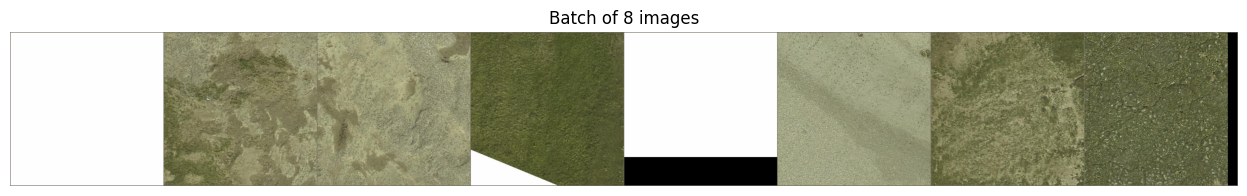

In [13]:
%matplotlib inline
# Showing some samples of patches and the annotations
import matplotlib.pyplot as plt
from animaloc.datasets import CSVDataset
from animaloc.data.batch_utils import show_batch, collate_fn
from torch.utils.data import DataLoader
import torch
import albumentations as A
batch_size = 8
csv_path = '/content/val_patches_FCH_CAH/gt.csv'
image_path = '/content/val_patches_FCH_CAH'
dataset_all = FolderDataset(csv_path, image_path, [A.Normalize()])
dataloader = DataLoader(dataset_all, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)

sample_batch = next(iter(dataloader))
for i in range(len(sample_batch[1])):
  points = sample_batch[1][i]['points'].numpy()
  print(len(sample_batch[1][i]['labels']))
  bbox= []
  for pt in points:
      bbox.append([pt[0]-2,pt[1]-2,pt[0]+2,pt[1]+2])
  #print(len(sample_batch[1][i]['labels']))
  sample_batch[1][i]['annotations']=torch.tensor(bbox)
plt.figure(figsize=(16,2))
show_batch(sample_batch)

In [ ]:
sample_batch[1][0]['labels']

tensor([], dtype=torch.int64)

In [34]:
!git config --global user.emnail "ghazaleh.serati@usherbrooke.ca"
!git config --global user.name "gazalssr"
!git add .
!git commit -m "a decoder added to the binary encoder"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@ada38ddb21b4.(none)')


## Define HerdNet for training

In [18]:
from animaloc.models import DLAEncoder
from torch import Tensor
from animaloc.models import LossWrapper
from animaloc.train.losses import FocalLoss
from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, L1Loss
import torch

num_classes=2
# dla_encoder = DLAEncoder(num_classes=num_classes).cuda()
dla_encoder_decoder = DLAEncoderDecoder(num_classes=num_classes).cuda()
image= torch.ones([1,3,512,512]).cuda()
print(torch.cuda.mem_get_info())

# cls= dla_encoder(image)
cls= dla_encoder_decoder(image)
weight = Tensor([1.05,20]).cuda()
if binary:
  losses = [
      {'loss': BCEWithLogitsLoss(reduction='mean'), 'idx': 0, 'idy': 0, 'lambda': 1.0, 'weight':weight, 'name': 'bce_loss'},
      ]
else:
  losses = [
      {'loss': L1Loss(reduction='mean'), 'idx': 0, 'idy': 0, 'lambda': 1.0, 'name': 'bce_loss'},
      ]
# dla_encoder = LossWrapper(dla_encoder, losses=losses)
dla_encoder_decoder = LossWrapper(dla_encoder, losses=losses)

NameError: name 'DLAEncoderDecoder' is not defined

### Functions used to freeze part of the network

In [ ]:
def get_parameter_names(model): # getting the model layers
  param_dict= dict()
  for l, (name,param) in enumerate(model.named_parameters()):
    #print(l,":\t",name,type(param),param.requires_grad)
    param_dict[name]= l
  return param_dict

In [ ]:
#Freeze the layers
def freeze_parts(model, get_parameter_names, layers_to_freeze, lr, unfreeze=False):
    params_to_update = []

    for l, (name, param) in enumerate(model.named_parameters()):
        res = any(ele in name for ele in layers_to_freeze)
        param.requires_grad = unfreeze if res else not unfreeze

        if param.requires_grad == True:
            params_to_update.append({
                "params": param,
                "lr": lr,
            })

        # Print parameters to update
        if param.requires_grad:
            print(f"Trainable parameter: {name}")
        else:
            print(f"Frozen parameter: {name}")

    return params_to_update

In [ ]:
param_dict= get_parameter_names(dla_encoder.model)
print(param_dict)
lr = 1e-4 # learning rate
# layers_to_freeze= [] # nothing frozen
#layers_to_freeze= ['base_layer','level0','level1','level2','level3','level4'] # we are feezing all the levels below level5
layers_to_freeze= ['base_layer','level0','level1','level2','level3','level4','level5','fc','bottleneck_conv'] # we are feezing everything except cls_head

params_to_update = freeze_parts(dla_encoder.model,param_dict, layers_to_freeze,lr,False)


{'base_0.base_layer.0.weight': 0, 'base_0.base_layer.1.weight': 1, 'base_0.base_layer.1.bias': 2, 'base_0.level0.0.weight': 3, 'base_0.level0.1.weight': 4, 'base_0.level0.1.bias': 5, 'base_0.level1.0.weight': 6, 'base_0.level1.1.weight': 7, 'base_0.level1.1.bias': 8, 'base_0.level2.tree1.conv1.weight': 9, 'base_0.level2.tree1.bn1.weight': 10, 'base_0.level2.tree1.bn1.bias': 11, 'base_0.level2.tree1.conv2.weight': 12, 'base_0.level2.tree1.bn2.weight': 13, 'base_0.level2.tree1.bn2.bias': 14, 'base_0.level2.tree2.conv1.weight': 15, 'base_0.level2.tree2.bn1.weight': 16, 'base_0.level2.tree2.bn1.bias': 17, 'base_0.level2.tree2.conv2.weight': 18, 'base_0.level2.tree2.bn2.weight': 19, 'base_0.level2.tree2.bn2.bias': 20, 'base_0.level2.root.conv.weight': 21, 'base_0.level2.root.bn.weight': 22, 'base_0.level2.root.bn.bias': 23, 'base_0.level2.project.0.weight': 24, 'base_0.level2.project.1.weight': 25, 'base_0.level2.project.1.bias': 26, 'base_0.level3.tree1.tree1.conv1.weight': 27, 'base_0.lev

## Create the Trainer

In [ ]:
from torch.optim import Adam

from animaloc.train import Trainer
from animaloc.eval import ImageLevelMetrics, HerdNetStitcher, HerdNetEvaluator, TileEvaluator
from animaloc.utils.useful_funcs import mkdir

work_dir = '/content/drive/MyDrive/output'
mkdir(work_dir)

lr = 1e-4
weight_decay = 1e-3
epochs = 150

# optimizer = Adam(params=dla_encoder.parameters(), lr=lr, weight_decay=weight_decay)
optimizer = Adam(params=params_to_update, lr=lr, weight_decay=weight_decay)

metrics = ImageLevelMetrics(num_classes=num_classes)

evaluator = TileEvaluator(
    model=dla_encoder,
    dataloader=val_dataloader,
    metrics=metrics,
    stitcher=None,
    work_dir=work_dir,
    header='validation',
    )

trainer = Trainer(
    model=dla_encoder,
    train_dataloader=train_dataloader,
    optimizer=optimizer,
    num_epochs=epochs,
    evaluator=evaluator,             # metric evaluation
    # val_dataloader= val_dataloader, # loss evaluation
    work_dir=work_dir
    )

## Start training

In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import wandb
if wandb.run is not None:
  wandb.finish()
wandb.init(project="herdnet_pretrain")

wandb: Currently logged in as: ghazaleh-serati (wildlife-monitoring). Use `wandb login --relogin` to force relogin


In [ ]:
trainer.start(warmup_iters=100, checkpoints='best', select='max', validate_on='f1_score', wandb_flag =True)

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/usr/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 107] Transport endpoint is not connected
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asy

[TRAINING] - Epoch: [1] [  1/131] eta: 0:02:40 lr: 0.000002 loss: 0.2661 (0.2661) bce_loss: 0.2661 (0.2661) time: 1.2249 data: 0.8532 max mem: 2843


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/usr/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 107] Transport endpoint is not connected
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asy

[TRAINING] - Epoch: [1] [ 51/131] eta: 0:00:41 lr: 0.000051 loss: 0.2530 (0.2584) bce_loss: 0.2530 (0.2584) time: 0.4826 data: 0.1590 max mem: 2843


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/usr/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 107] Transport endpoint is not connected
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asy

[TRAINING] - Epoch: [1] [101/131] eta: 0:00:16 lr: 0.000100 loss: 0.2393 (0.2548) bce_loss: 0.2393 (0.2548) time: 0.4620 data: 0.1550 max mem: 2843


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/usr/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 107] Transport endpoint is not connected
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asy

[TRAINING] - Epoch: [1] [131/131] eta: 0:00:00 lr: 0.000100 loss: 0.2193 (0.2515) bce_loss: 0.2193 (0.2515) time: 0.4534 data: 0.1424 max mem: 2843
[TRAINING] - Epoch: [1] Total time: 0:01:08 (0.5228 s / it)
[TRAINING] - Epoch: [1] mean loss: 0.2515
[VALIDATION] - Epoch: [1] [ 1/13] eta: 0:00:13 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.0465 data: 0.7434 max mem: 2843


Streaming output truncated to the last 5000 lines.
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
    self.do_execute(
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
    res = shell.run_cell(c

[VALIDATION] - Epoch: [1] [11/13] eta: 0:00:02 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.6760 data: 0.2215 max mem: 2843


Streaming output truncated to the last 5000 lines.
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
    self.do_execute(
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
    res = shell.run_cell(c

[VALIDATION] - Epoch: [1] [13/13] eta: 0:00:00 n: 22 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.6269 data: 0.1908 max mem: 2843


Streaming output truncated to the last 5000 lines.
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    self._run_once()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
    handle._run()
  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
    self.ctx_run(self.run)
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
    yielded 

[VALIDATION] - Epoch: [1] Total time: 0:00:18 (1.4458 s / it)


Streaming output truncated to the last 5000 lines.
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
    self.do_execute(
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
    res = shell.run_cell(c

[VALIDATION] - Epoch: [1] f1_score: 1.0000
Best model saved - Epoch 1 - Validation value: 1.000000


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/usr/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 107] Transport endpoint is not connected
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asy

[TRAINING] - Epoch: [2] [  1/131] eta: 0:05:22 lr: 0.000100 loss: 0.2193 (0.2510) bce_loss: 0.2193 (0.2510) time: 2.4649 data: 2.0251 max mem: 2843


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/usr/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 107] Transport endpoint is not connected
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asy

[TRAINING] - Epoch: [2] [ 51/131] eta: 0:01:04 lr: 0.000100 loss: 0.1793 (0.2413) bce_loss: 0.1793 (0.2413) time: 0.8048 data: 0.4529 max mem: 2843


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/usr/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 107] Transport endpoint is not connected
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asy

[TRAINING] - Epoch: [2] [101/131] eta: 0:00:20 lr: 0.000100 loss: 0.1896 (0.2337) bce_loss: 0.1896 (0.2337) time: 0.4322 data: 0.1272 max mem: 2843


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/usr/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 107] Transport endpoint is not connected
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asy

[TRAINING] - Epoch: [2] [131/131] eta: 0:00:00 lr: 0.000100 loss: 0.2310 (0.2317) bce_loss: 0.2310 (0.2317) time: 0.4892 data: 0.1749 max mem: 2843
[TRAINING] - Epoch: [2] Total time: 0:01:23 (0.6375 s / it)
[TRAINING] - Epoch: [2] mean loss: 0.2118
[VALIDATION] - Epoch: [2] [ 1/13] eta: 0:00:14 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 1.1122 data: 0.8177 max mem: 2843


Streaming output truncated to the last 5000 lines.
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
    self.do_execute(
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
    res = shell.run_cell(c

[VALIDATION] - Epoch: [2] [11/13] eta: 0:00:02 n: 32 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.7497 data: 0.2956 max mem: 2843


Streaming output truncated to the last 5000 lines.
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
    self.do_execute(
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
    res = shell.run_cell(c

[VALIDATION] - Epoch: [2] [13/13] eta: 0:00:00 n: 22 recall: 1.0 precision: 1.0 f1-score: 1.0 MAE: 0.0 MSE: 0.0 RMSE: 0.0 time: 0.6951 data: 0.2521 max mem: 2843


Streaming output truncated to the last 5000 lines.
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
    self.do_execute(
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
    res = shell.run_cell(c

[VALIDATION] - Epoch: [2] Total time: 0:00:19 (1.5333 s / it)


Streaming output truncated to the last 5000 lines.
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
    self.do_execute(
  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
    res = shell.run_cell(c

[VALIDATION] - Epoch: [2] f1_score: 1.0000


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/usr/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 107] Transport endpoint is not connected
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asy

[TRAINING] - Epoch: [3] [  1/131] eta: 0:05:07 lr: 0.000100 loss: 0.2280 (0.2315) bce_loss: 0.2280 (0.2315) time: 2.3469 data: 1.9300 max mem: 2843


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/usr/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 107] Transport endpoint is not connected
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asy

[TRAINING] - Epoch: [3] [ 51/131] eta: 0:01:11 lr: 0.000100 loss: 0.1878 (0.2259) bce_loss: 0.1878 (0.2259) time: 0.8060 data: 0.4583 max mem: 2843


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/usr/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 107] Transport endpoint is not connected
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asy

[TRAINING] - Epoch: [3] [101/131] eta: 0:00:22 lr: 0.000100 loss: 0.1713 (0.2211) bce_loss: 0.1713 (0.2211) time: 0.4871 data: 0.1640 max mem: 2843


KeyboardInterrupt: ignored

In [ ]:
df= evaluator.results # getting the validation results in pandas format
df.head()
csv_file_path = '/content/drive/MyDrive/detection_results/Binary_big_150.csv'
df_head.to_csv(csv_file_path, index=False)

In [ ]:
evaluator.metrics.confusion_matrix

Copy of the weight of DLA encoder toward HerdNet:

In [ ]:
#best_model_first task
from animaloc.models import HerdNet
# Load the checkpoint
checkpoint = torch.load('/content/drive/MyDrive/output/Binary_big.pth')

# Update the model parameters
dla_encoder.load_state_dict(checkpoint['model_state_dict'])
herdnet = HerdNet(num_classes=num_classes, down_ratio=down_ratio).cuda()
import copy

herdnet.base_0= copy.deepcopy(dla_encoder.model.base_0)

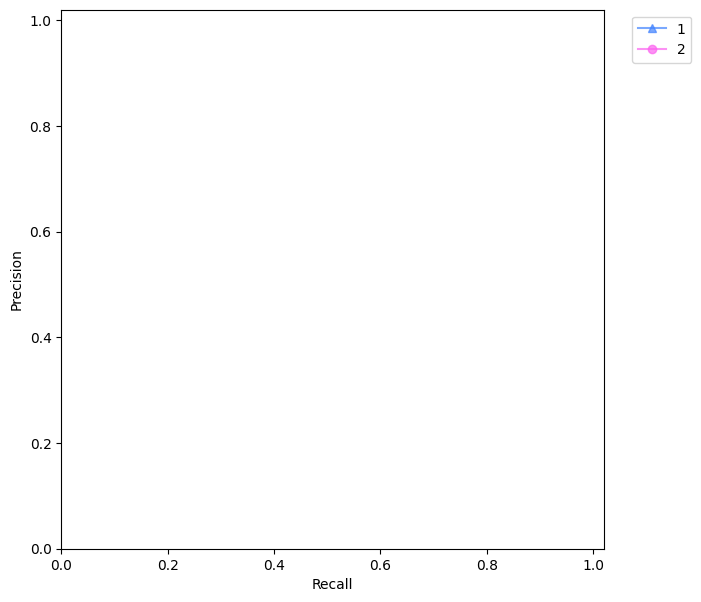

In [ ]:
from animaloc.vizual import PlotPrecisionRecall

pr_curve = PlotPrecisionRecall(legend=True)
metrics = evaluator._stored_metrics
for c in range(1, metrics.num_classes):
    rec, pre = metrics.rec_pre_lists(c)
    pr_curve.feed(rec, pre, str(c))

pr_curve.plot()

# Utilisation de fichiers de configuration avec Hyrda

In [ ]:
%%writefile /content/HerdNet/configs/train/my_herdnet.yaml
wandb_project: 'herdnet'
wandb_entity: 'ghazaleh-serati'
wandb_run: 'myrun'
seed: 1
device_name: 'cuda'

model:
  name: 'HerdNet'
  from_torchvision: False
  load_from: null
  resume_from: null
  kwargs:
    num_layers: 34
    pretrained: True
    down_ratio: 2
    head_conv: 64
  freeze: null

losses:
  FocalLoss:
    print_name: 'focal_loss'
    from_torch: False
    output_idx: 0
    target_idx: 0
    lambda_const: 1.0
    kwargs:
      reduction: 'mean'
      normalize: False
  CrossEntropyLoss:
    print_name: 'ce_loss'
    from_torch: True
    output_idx: 1
    target_idx: 1
    lambda_const: 1.0
    kwargs:
      reduction: 'mean'
      weight: [0.1,5.,15.,1.]

datasets:
  img_size: [512,512]
  anno_type: 'point'
  num_classes: 7
  collate_fn: null

  class_def:
    1: 'empty'
    2: 'non-empty'


  train:
    name: 'CSVDataset'
    csv_file: '/content/drive/MyDrive/Train_patches/gt.csv'
    root_dir: '/content/drive/MyDrive/Train_patches'

    sampler: null

    albu_transforms:
      HorizontalFlip:
        p: 0.5
      MotionBlur:
        p: 0.5
      Normalize:
        p: 1.0

    end_transforms:
      MultiTransformsWrapper:
        FIDT:
          num_classes: ${train.datasets.num_classes}
          down_ratio: ${train.model.kwargs.down_ratio}
        PointsToMask:
          radius: 2
          num_classes: ${train.datasets.num_classes}
          squeeze: True
          down_ratio: 32

  validate:
    name: 'CSVDataset'
    csv_file: '/content/drive/MyDrive/val_patches/gt.csv'
    root_dir: '//content/drive/MyDrive/val_patches'

    albu_transforms:
      Normalize:
        p: 1.0

    end_transforms:
      DownSample:
        down_ratio: ${train.model.kwargs.down_ratio}
        anno_type: ${train.datasets.anno_type}

training_settings:
  trainer: 'Trainer'
  valid_freq: 1
  print_freq: 100
  batch_size: 16
  optimizer: 'adam'
  lr: 1e-4
  weight_decay: 0.0005
  auto_lr:
    mode: 'max'
    patience: 10
    threshold: 1e-4
    threshold_mode: 'rel'
    cooldown: 10
    min_lr: 1e-6
    verbose: True
  warmup_iters: 100
  vizual_fn: null
  epochs: 100
  evaluator:
    name: 'HerdNetEvaluator'
    threshold: 5
    select_mode: 'max'
    validate_on: 'f1_score'
    kwargs:
      print_freq: 10
      lmds_kwargs:
        kernel_size: [3,3]
        adapt_ts: 0.3
  stitcher:
    name: 'HerdNetStitcher'
    kwargs:
      overlap: 0
      down_ratio: ${train.model.kwargs.down_ratio}
      up: False
      reduction: 'mean'

Overwriting /content/HerdNet/configs/train/my_herdnet.yaml


In [ ]:
import wandb
if wandb.run is not None:
  wandb.finish()
!python /content/HerdNet/tools/train.py -m train=my_herdnet

/content/HerdNet/tools/train.py:222: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='../configs', config_name="config")
[2023-09-18 16:19:42,287][HYDRA] Launching 1 jobs locally
[2023-09-18 16:19:42,287][HYDRA] 	#0 : train=my_herdnet
/usr/local/lib/python3.10/dist-packages/hydra/_internal/core_plugins/basic_launcher.py:74: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
Setting the seed to 1
Building datasets ...
Error executing job with overrides: ['train=my_herdnet']
Traceback (most recent call last):
  File "/content/HerdNet/tools/train.py", line 241, in main
    train_dataset = animaloc.datasets.__dict__[train_args.name](
  File "/content/HerdNet/animaloc/datasets/csv.py", line 111, in 